<a href="https://colab.research.google.com/github/nidhish004/nlp/blob/main/nidhish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-8-1d50b777158b>:106: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 5)


Using sample text: Natural language processing allows computers to understand human language.


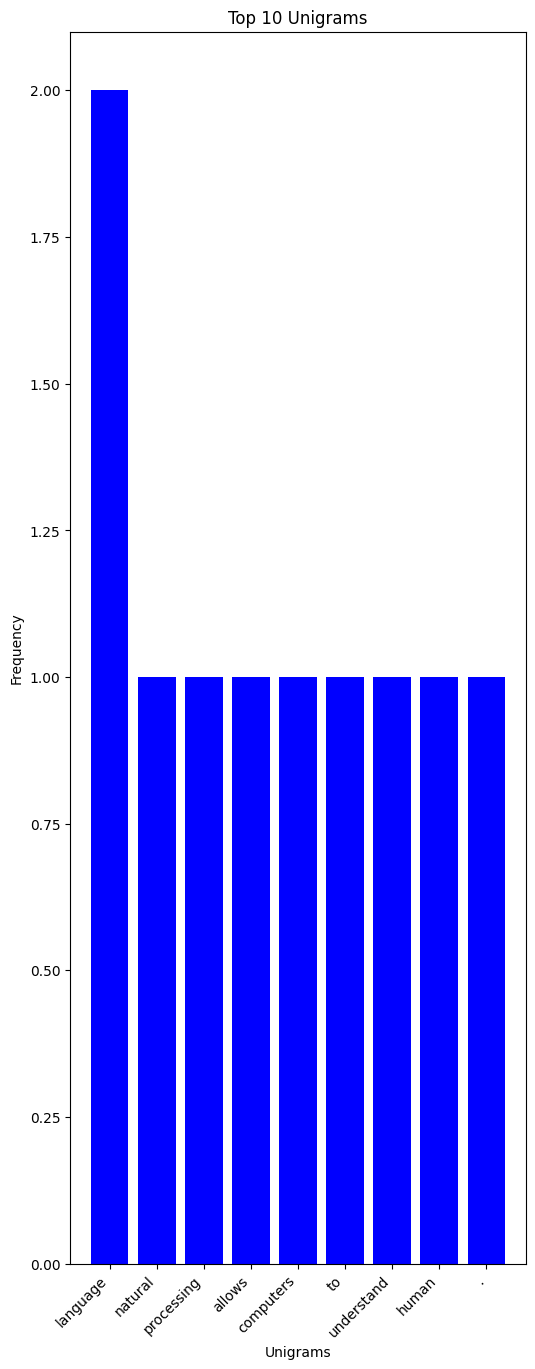

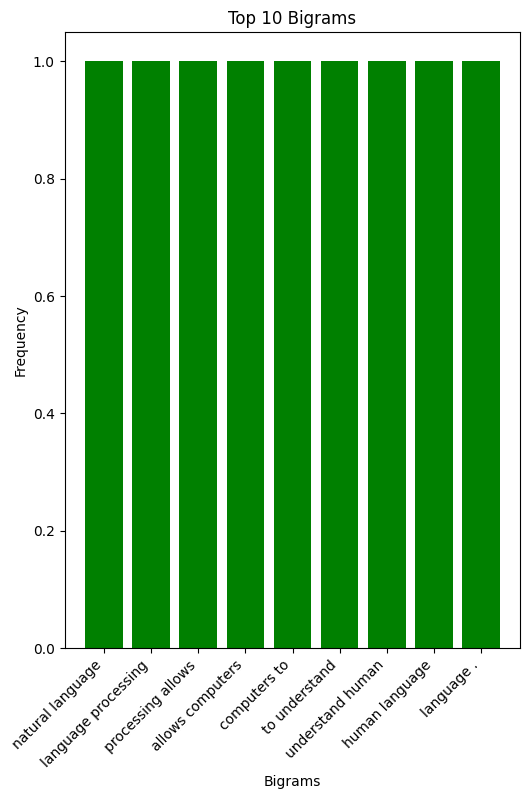

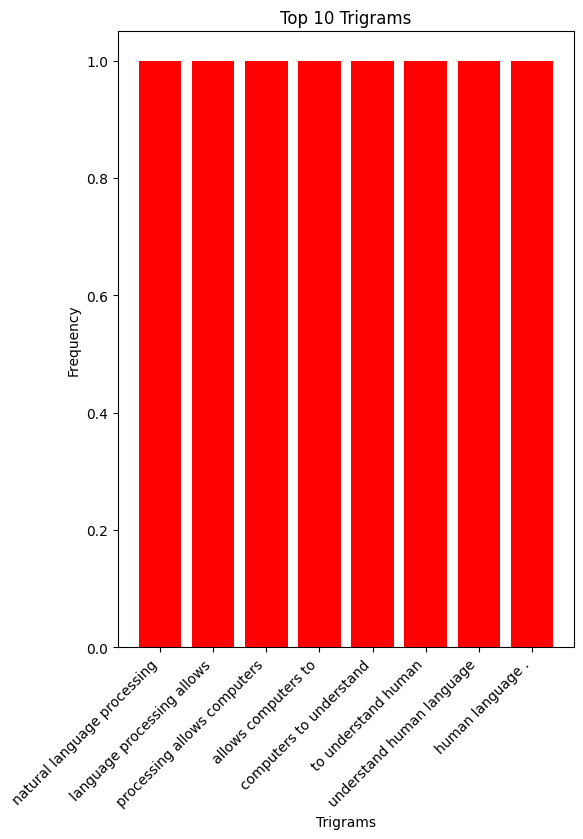

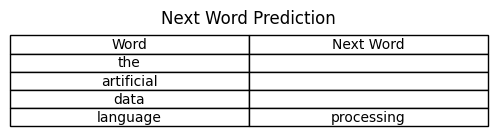

In [ ]:


import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

# Download necessary NLTK data files (you might need to run these lines once)
nltk.download('punkt')

# Sample random text
sample_texts = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is a field of computer science.",
    "Data science involves using scientific methods to analyze data.",
    "Natural language processing allows computers to understand human language.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning algorithms can analyze large amounts of data."
]

# Randomly choose a sample text
text = random.choice(sample_texts)
print(f"Using sample text: {text}")

# Tokenize the text
tokens = word_tokenize(text.lower())

# Generate Unigrams, Bigrams, and Trigrams
unigrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Frequency Distribution of Unigrams, Bigrams, and Trigrams
unigram_freq = FreqDist(unigrams)
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

# Bigram Probabilities
cfd = ConditionalFreqDist(bigram_freq)
bigram_prob = {bg: cfd[bg[0]].freq(bg[1]) for bg in bigram_freq}

# Next Word Prediction
def predict_next_word(word):
    if word in cfd:
        return cfd[word].most_common(1)[0][0]
    else:
        return None

# Create DataFrames for visualization
df_unigrams = pd.DataFrame(unigram_freq.items(), columns=['Unigram', 'Frequency'])
df_bigrams = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])
df_trigrams = pd.DataFrame(trigram_freq.items(), columns=['Trigram', 'Frequency'])
df_bigram_prob = pd.DataFrame(bigram_prob.items(), columns=['Bigram', 'Probability'])
df_bigram_prob['Bigram'] = df_bigram_prob['Bigram'].apply(lambda x: f'{x[0]} {x[1]}')  # Format bigrams as strings

# Next Word Prediction DataFrame
next_word_examples = ['the', 'artificial', 'data', 'language']
predictions = {word: predict_next_word(word) for word in next_word_examples}
df_predictions = pd.DataFrame(predictions.items(), columns=['Word', 'Next Word'])

# Visualization
plt.figure(figsize=(20, 16))  # Increased figure size for clarity

plt.subplot(1, 3, 1)
unigram_labels, unigram_values = zip(*unigram_freq.most_common(10))
unigram_labels = [label[0] for label in unigram_labels]
plt.bar(unigram_labels, unigram_values, color='blue')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams')
plt.xticks(rotation=45, ha='right')

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 2)
bigram_labels, bigram_values = zip(*bigram_freq.most_common(10))
bigram_labels = [f'{x[0]} {x[1]}' for x in bigram_labels]
plt.bar(bigram_labels, bigram_values, color='green')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 3)
trigram_labels, trigram_values = zip(*trigram_freq.most_common(10))
trigram_labels = [f'{x[0]} {x[1]} {x[2]}' for x in trigram_labels]
plt.bar(trigram_labels, trigram_values, color='red')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
bigram_prob_labels, bigram_prob_values = zip(*sorted(bigram_prob.items(), key=lambda item: item[1], reverse=True)[:10])
bigram_prob_labels = [f'{x[0]} {x[1]}' for x in bigram_prob_labels]
plt.bar(bigram_prob_labels, bigram_prob_values, color='purple')
plt.xlabel('Bigrams')
plt.ylabel('Probability')
plt.title('Top 10 Bigram Probabilities')
plt.xticks(rotation=45, ha='right')

# Display Next Word Prediction
plt.subplot(3, 2, 5)
plt.axis('off')  # Turn off the axis for the text plot
plt.table(cellText=df_predictions.values, colLabels=df_predictions.columns, cellLoc='center', loc='center', fontsize=12)
plt.title('Next Word Prediction')

plt.tight_layout()
plt.show()
